In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 
from scipy import stats
from scipy.stats import skew 
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("Loan-train.csv")




In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
 null = df.isnull().sum()

In [6]:
null

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df['Credit_History'].fillna(int(df['Credit_History'].mean()))
df['LoanAmount'].fillna(int(df['LoanAmount'].mean()), inplace =True )
df['Loan_Amount_Term'].fillna(int(df['Loan_Amount_Term'].mean()), inplace= True)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.shape

(614, 13)

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,564.000000
mean,5403.459283,1621.245798,146.397394,342.000000,0.842199
std,6109.041673,2926.248369,84.037503,64.372489,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
df.fillna(method = 'ffill', inplace = True)

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.shape

(614, 13)

In [17]:
df.drop(columns={'Loan_ID'}, inplace = True )

In [18]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df.Gender.replace(('Male', 'Female'),(1,0),inplace = True)
df.Married.replace(('Yes', 'No'),(1,0),inplace = True)
df.Self_Employed.replace(('Yes', 'No'),(1,0),inplace = True)
df.Loan_Status.replace(('Y', 'N'),(1,0),inplace = True)
df.Education.replace(('Graduate', 'Not Graduate'),(1,0),inplace = True)

In [ ]:
# changing into numerical values

In [20]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,1
7,1,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,Urban,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [22]:
df.Property_Area

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [23]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [24]:
area = df.Property_Area.value_counts()
area

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<Axes: ylabel='Property_Area'>

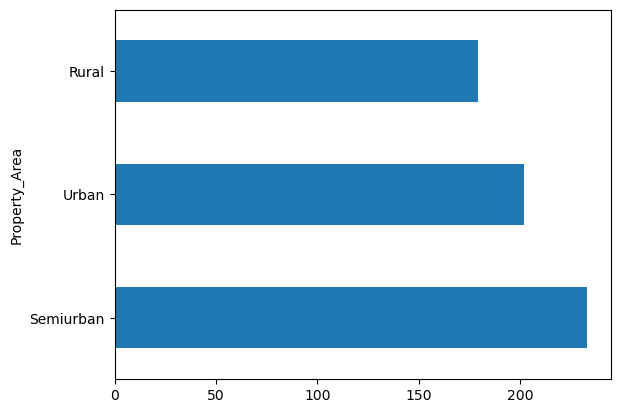

In [25]:
area.plot(kind='barh')

In [ ]:
# Highest loan has been applied from the semiurban area

<Axes: xlabel='count', ylabel='Density'>

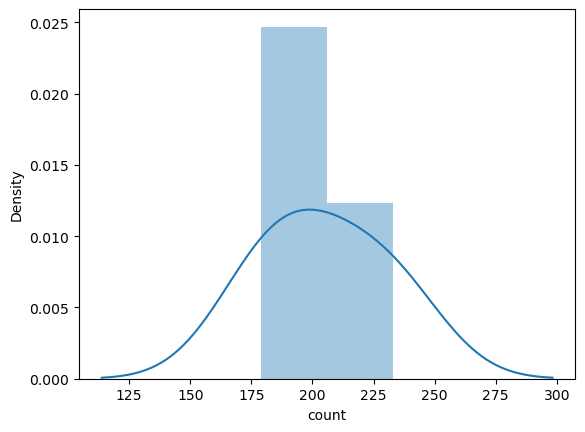

In [26]:
sns.distplot(area)

In [ ]:
# area is between 175 to 225

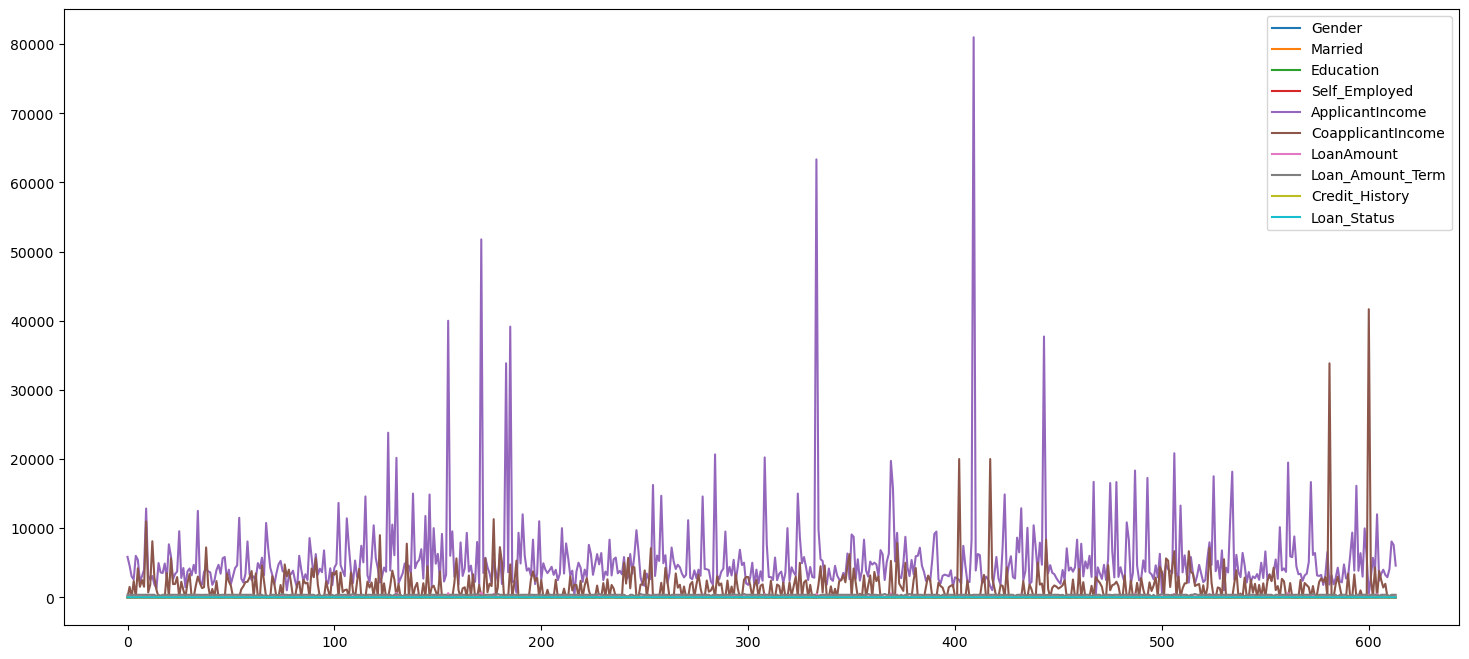

In [27]:
df.plot(figsize= (18,8))
plt.show()

In [106]:
# applied loann amount is changing irrespective of the co applicants income 

In [28]:
df.LoanAmount

0      146.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

<Axes: xlabel='LoanAmount'>

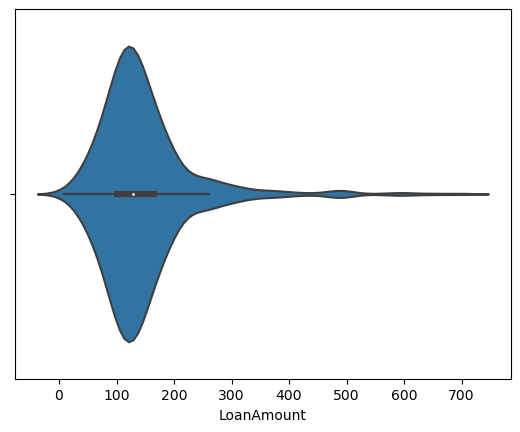

In [29]:
sns.violinplot(x = 'LoanAmount', data = df)

<Axes: xlabel='Gender', ylabel='LoanAmount'>

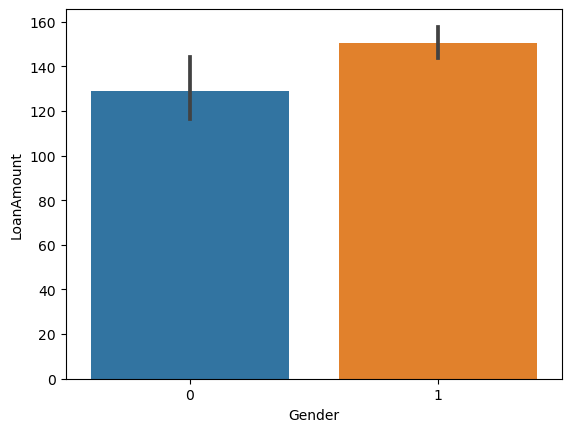

In [30]:
sns.barplot(x = 'Gender', y = 'LoanAmount', data = df)

In [ ]:
# males are taking high amt of loan then females 

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


<Axes: xlabel='Credit_History', ylabel='ApplicantIncome'>

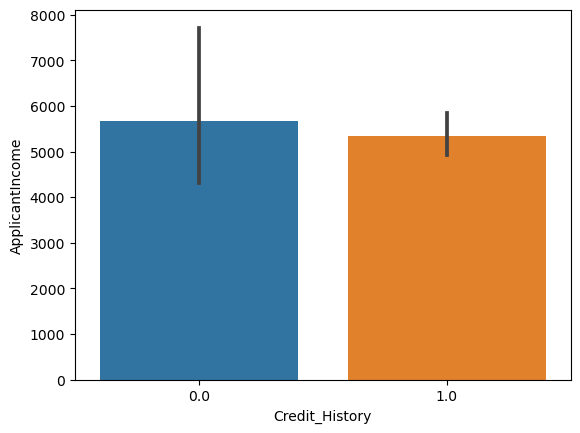

In [32]:
sns.barplot(x = 'Credit_History', y = 'ApplicantIncome', data = df )

<Axes: xlabel='Married', ylabel='count'>

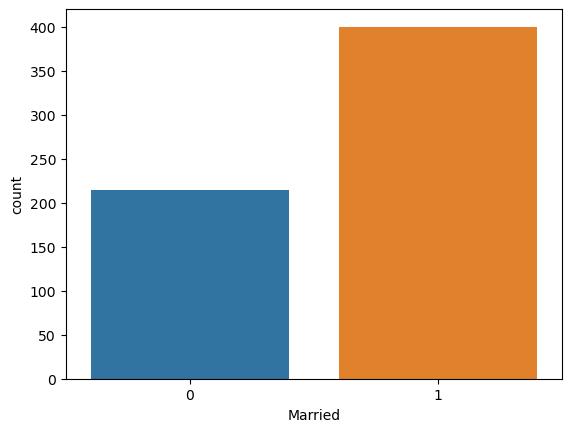

In [33]:
sns.countplot(x = 'Married', data = df)

In [34]:
#mejority of applicatnts are married 

<Axes: xlabel='Gender', ylabel='count'>

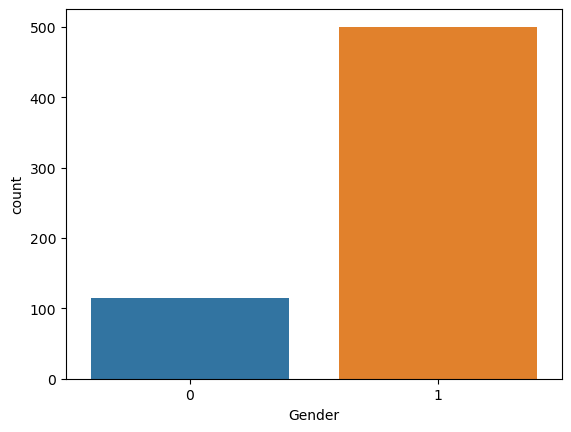

In [35]:
sns.countplot(x = "Gender", data = df)

In [36]:
# most of them are maile 

<Axes: xlabel='Dependents', ylabel='count'>

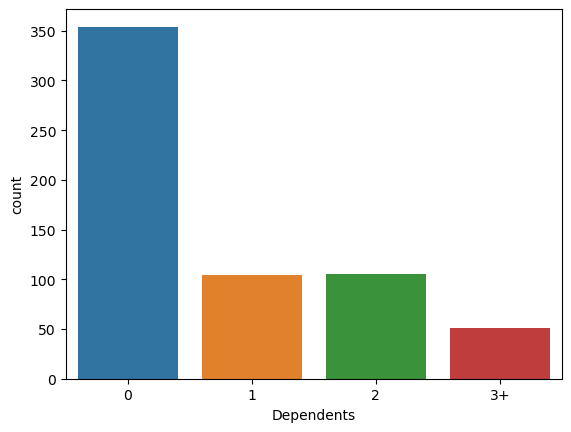

In [37]:
sns.countplot(x = "Dependents", data = df)

In [ ]:
# people who have applied for the loan have no dependents followed by 1,2,3

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

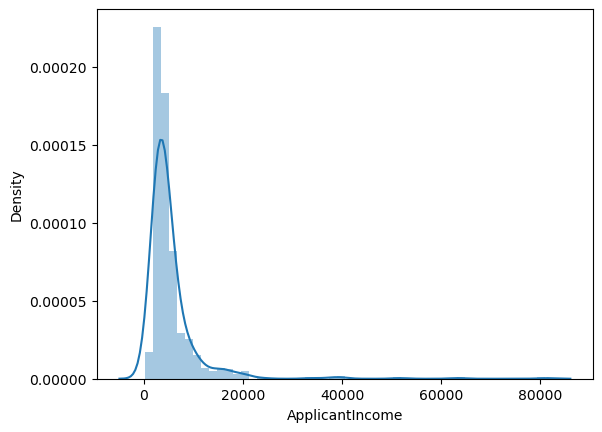

In [38]:
sns.distplot(df["ApplicantIncome"])

In [39]:
## to normalize it we are applying log transformation 

In [40]:
df ["ApplicantIncome"] = np.log(df["ApplicantIncome"])

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

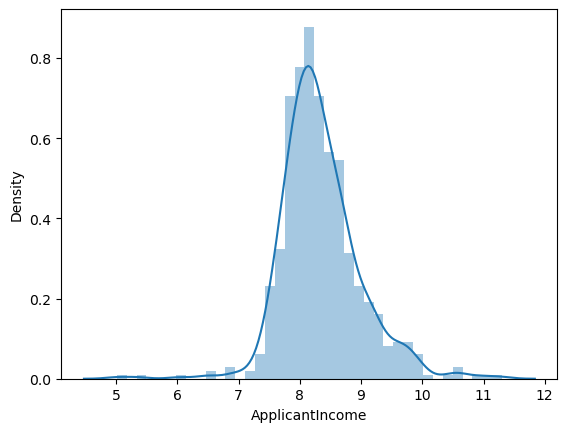

In [41]:
sns.distplot(df["ApplicantIncome"])

<Axes: >

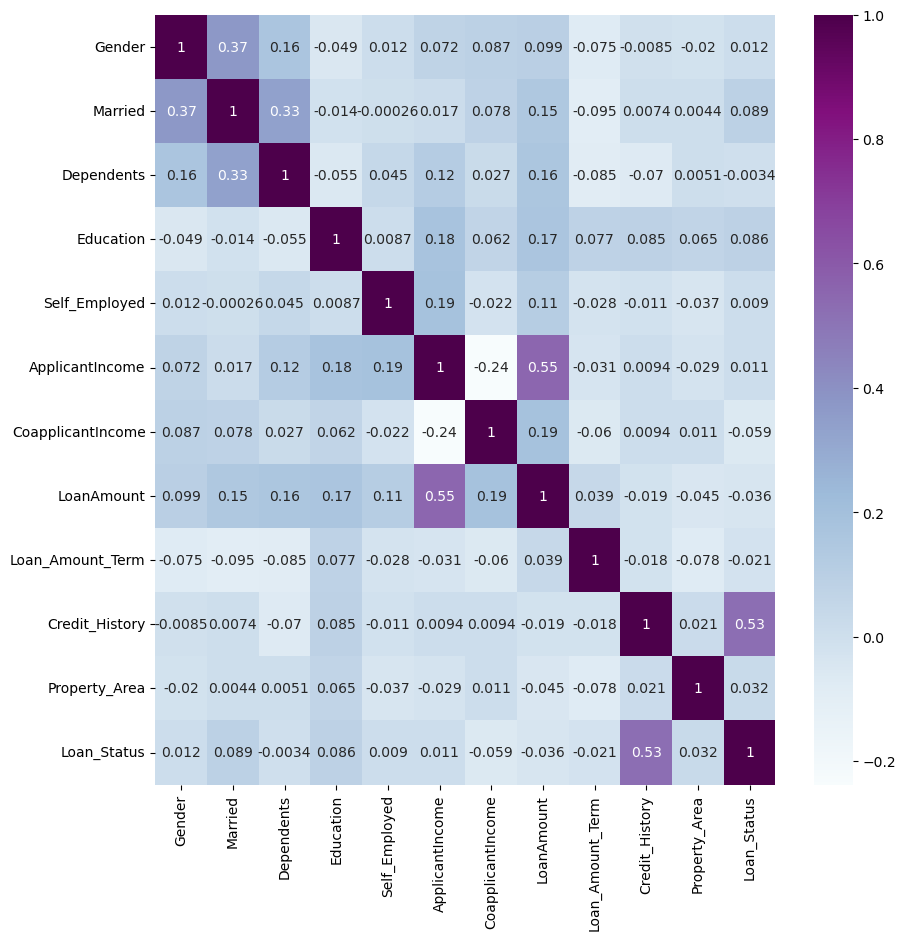

In [79]:
corr  = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True , cmap = "BuPu")

# Lable encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
encode = ['Dependents','Property_Area']

In [45]:
le.fit(encode)

LabelEncoder()

In [46]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
# we have used lable encoder on above two columns because property area is in three classes and dependents number 
# is also changing 

In [47]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.0,146.0,360.0,1.0,2,1
1,1,1,1,1,0,8.430109,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,7.856707,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,8.699515,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972466,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,8.320205,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8.996157,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,8.933664,0.0,187.0,360.0,1.0,2,1


In [48]:
y = df['Loan_Status']
x = df.drop(['Loan_Status'], axis = 1)

In [49]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.674026,0.0,146.0,360.0,1.0,2
1,1,1,1,1,0,8.430109,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,8.006368,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,7.856707,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,8.699515,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972466,0.0,71.0,360.0,1.0,0
610,1,1,3,1,0,8.320205,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8.996157,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,8.933664,0.0,187.0,360.0,1.0,2


In [50]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [52]:
log = LogisticRegression()

In [53]:
log.fit(x_train,y_train)

LogisticRegression()

In [54]:
print (f'Training Score:{log.score(x_train,y_train)}')
print (f'Testing Score:{log.score(x_test,y_test)}')

Training Score:0.8065173116089613
Testing Score:0.8130081300813008


In [55]:
y_pred = log.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [56]:
from sklearn import metrics

In [57]:
metrics.accuracy_score(y_test,y_pred)

0.8130081300813008

In [58]:
print ("", metrics.classification_report(y_test,y_pred))

               precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123



In [59]:
print ("", metrics.confusion_matrix(y_test,y_pred))

 [[21 22]
 [ 1 79]]


In [60]:
cnfTrain = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ['Pred','Pred'],
                        index = ['Act0','Act1'])

In [61]:
cnfTrain

,Pred,Pred
Act0,21,22
Act1,1,79


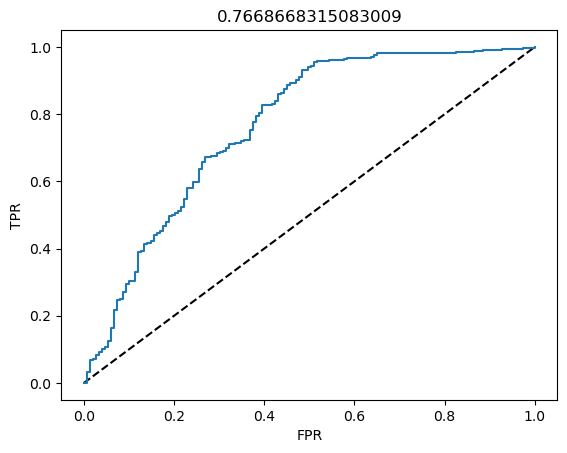

In [62]:
probab = log.predict_proba(x_train)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_train, probab)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR') # x axis 
plt.ylabel('TPR') # y axis 
plt.title(metrics.roc_auc_score(y_train, probab)) ## key elements to plot the graph
plt.show()

In [80]:
param_grid = {
    'penalty' : ['l1','l2'],
    'C' : [0.1, 0.5, 1, 5 ,10]
}

In [94]:
grid_search = GridSearchCV(estimator = log, param_grid = param_grid, cv = 5)

In [95]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [96]:
best_param = grid_search.best_params_
best_model = grid_search.best_estimator_ 
best_model 

LogisticRegression(C=10)

In [97]:
best_param

{'C': 10, 'penalty': 'l2'}

In [98]:
y_pred = grid_search.predict(x_test)

In [99]:
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', acc)

Accuracy : 0.8130081300813008


In [100]:
roc_au = metrics.roc_auc_score(y_test, y_pred)
print('ROC AUC :', roc_au)

ROC AUC : 0.7379360465116279


In [87]:
print('', metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123



In [71]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

# Precision Recall Curve

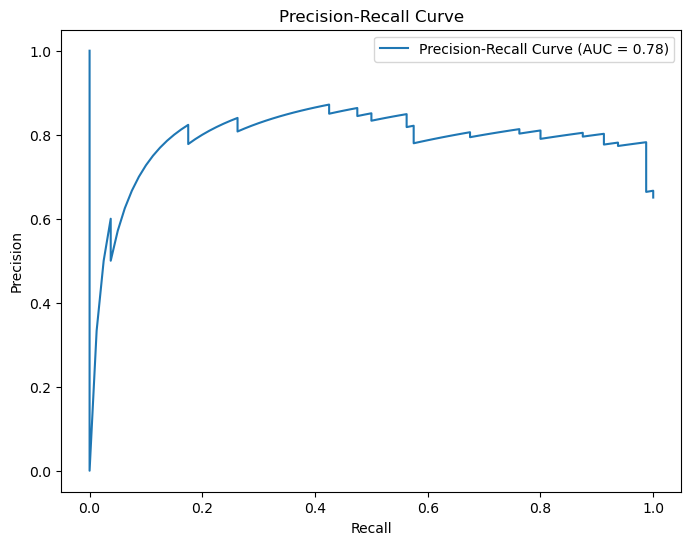

In [72]:
probab = log.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, probab)

auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix

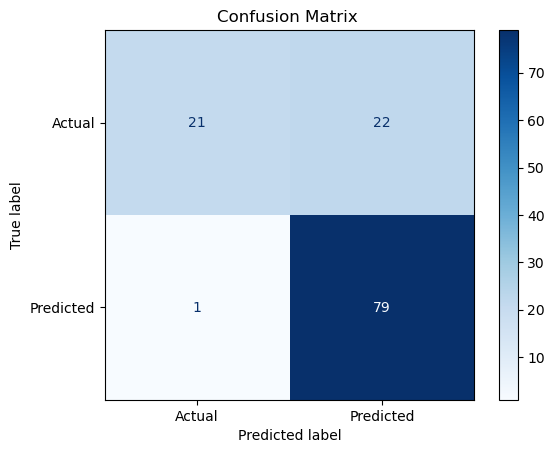

In [107]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Actual', 'Predicted'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix ')
plt.show()

# Hyperparameter Tuning

In [74]:
param_grid = {
    'C': np.logspace(-3, 3, 7),  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'] 
}

grid_search = GridSearchCV(log, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.8130081300813008


In [102]:
# Confusion Matrix After Tuning
# conf_matrix = confusion_matrix(y_test, y_pred)


# disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
# disp.plot(cmap='Blues', values_format='d')
# plt.title('Confusion Matrix After Tuning')
# plt.show()

# Cross Validation Score

In [76]:
cv_scores = cross_val_score(log, x, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-Validation Scores: [0.81300813 0.76422764 0.7804878  0.84552846 0.81147541]
Mean CV Score: 0.8029454884712781
Standard Deviation of CV Scores: 0.028251529316565327


# Randomized Search CV

In [77]:
param_dist = {
    'C': uniform(loc=0, scale=4),  
    'penalty': ['l1', 'l2'],        
    'solver': ['liblinear'],        
}

random_search = RandomizedSearchCV(log, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)


Best Hyperparameters: {'C': 1.49816047538945, 'penalty': 'l1', 'solver': 'liblinear'}


# Support Vector Machine

In [78]:
svm_model = SVC(kernel='linear')  
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy with SVM:", accuracy_svm)

Accuracy with SVM: 0.8130081300813008
